In [136]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [23]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X = train_data.drop('label', axis=1)
y = train_data['label']

X_test = test_data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_scaled_reshaped = X_scaled.reshape(-1,28,28,1)
X_test_scaled_reshaped = X_test_scaled.reshape(-1,28,28,1)

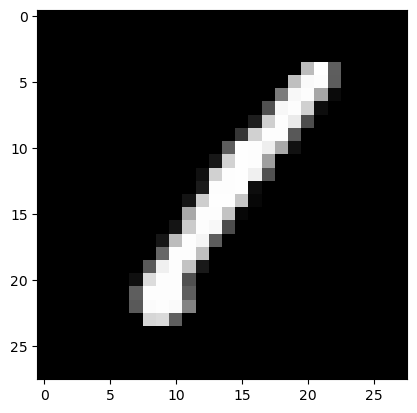

<Figure size 400x400 with 0 Axes>

In [27]:
image = X.iloc[0].values.reshape(28,28)
plt.imshow(image,cmap='gray')
plt.figure(figsize=(4, 4))
plt.show()

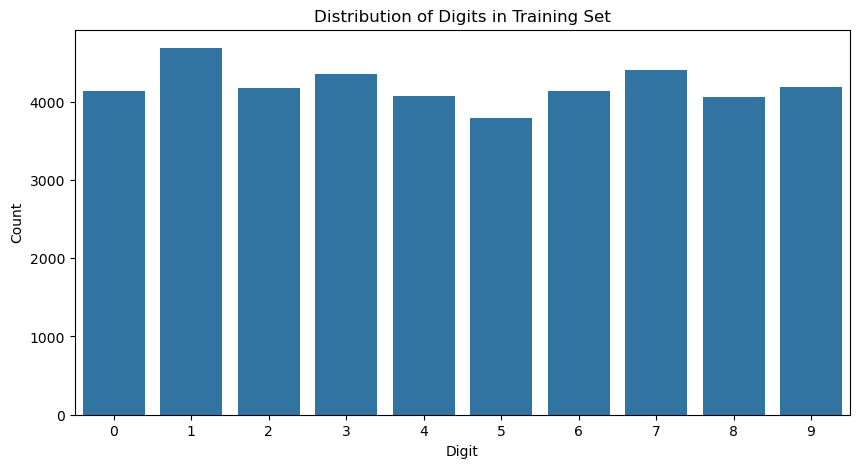

In [21]:

plt.figure(figsize=(10,5))
sns.countplot(x=y)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

Min pixel value after scaling: 0.0
Max pixel value after scaling: 1.0


In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state =42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_val)
print("\nClassification Report:") 
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.98      0.99      0.99       909
           2       0.97      0.96      0.97       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.97      0.98      0.98       785
           7       0.97      0.95      0.96       893
           8       0.96      0.96      0.96       835
           9       0.94      0.94      0.94       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Logistic Regression Accuracy: 0.9654761904761905


In [126]:
# Build CNN Model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [127]:
train_data2 = pd.read_csv('train.csv')
test_data2 = pd.read_csv('test.csv')

X2 = train_data.drop('label', axis=1).values
y2 = train_data['label'].values

X_test2 = test_data

print("Original pixel value range:", X2.min(), "-", X2.max())

Original pixel value range: 0 - 255


In [128]:
# Reshape and normalize
X2 = X2.reshape(-1,28,28,1) / 255 # Normalize pixel values to [0, 1]
X_test2 = X_test2.values.reshape(-1,28,28,1) /255

# Split data into training and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2,test_size=0.2, random_state=42)

#One-hot encode the labels
y_train2 = to_categorical(y_train2, num_classes=10)
y_val2 = to_categorical(y_val2, num_classes=10)

In [129]:
print("Pixel value range in X_train2:", X_train2.min(), "-", X_train2.max())

Pixel value range in X_train2: 0.0 - 1.0


In [130]:
modelc = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), #vConvolutional Layer
    MaxPooling2D((2,2)), # Max-Pooling Layer
    Dropout(0.25), # Dropout to prevent overfitting

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')])

In [131]:
modelc.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [132]:
history = modelc.fit(
    X_train2, y_train2,
    validation_data=(X_val2,y_val2),
    epochs=10,
    batch_size=32)

Epoch 1/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3336 - accuracy: 0.8952 - val_loss: 0.0844 - val_accuracy: 0.9733
Epoch 2/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.1258 - accuracy: 0.9617 - val_loss: 0.0580 - val_accuracy: 0.9818
Epoch 3/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0908 - accuracy: 0.9729 - val_loss: 0.0509 - val_accuracy: 0.9829
Epoch 4/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0827 - accuracy: 0.9750 - val_loss: 0.0427 - val_accuracy: 0.9863
Epoch 5/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.0370 - val_accuracy: 0.9885
Epoch 6/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 7/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0363 - val_ac

In [134]:
val_loss, val_accuracy = modelc.evaluate(X_val2, y_val2)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

263/263 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9904
Validation Accuracy: 99.04%


In [135]:
y_test_pred = modelc.predict(X_test2)
y_test_labels = np.argmax(y_test_pred, axis=1)

# Create a DataFrame with ImageId and Label
submission = pd.DataFrame({
    'ImageId': range(1, len(y_test_labels) + 1),  # ImageId starts from 1
    'Label': y_test_labels
})
submission.to_csv('submission.csv', index=False)


875/875 [==============================] - 2s 2ms/step
